<a href="https://colab.research.google.com/github/vpagonis/CRCbook/blob/main/Chapter_5_Multiple_Integrals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5 - Multiple Integrals

This notebook contains the code for the example problems found in Chapter 5.

**Example 5.1: Plotting a surface $z=f(x,y)$ and the rectangular domain $D$**

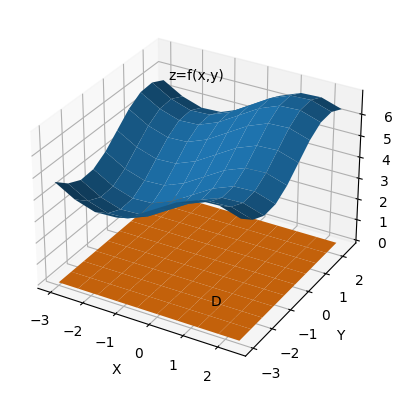

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

# surface plot for z=3+sin(x)+sin(y)
x = np.arange(-3, 3, 0.6)             # x-values
y = np.arange(-3, 3, 0.6)			 # y-values

X, Y = np.meshgrid(x,y)              # create grid values (X,Y)
Z = 5+np.sin(X)+np.sin(Y)             # evaluate Z values from equation

fig = plt.figure()
axes = fig.add_subplot(projection ='3d')      # create 3D plot

# plot two 3D surfaces:  using (X,Y,Z) and on xy-plane (Z=0)
axes.plot_surface(X, Y, Z)
axes.plot_surface(X, Y, 0*X)

axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')

axes.text(-2.6,2,6,'z=f(x,y)')
axes.text(1,-2,0,'D')
plt.show()

**Example 5.2: Evaluating the mass M of an object with non-uniform density**

In [2]:
%reset -f

from sympy import symbols, integrate
print('-'*28,'CODE OUTPUT','-'*29,'\n')
a, x, y = symbols('a, x, y',real=True)    # define symbols

f = a*y
res1 = integrate(f, (y, 3, 6), (x, 2, 4)) # evaluate the integral
print('Double Integral of f(x,y)=y in the intervals [2,4],[3,6] =',res1)

res2 = integrate(f, (x, 2, 4), (y, 3, 6)) # reverse integration order
print('Double Integral in reverse order of integration =',res2)

---------------------------- CODE OUTPUT ----------------------------- 

Double Integral of f(x,y)=y in the intervals [2,4],[3,6] = 27*a
Double Integral in reverse order of integration = 27*a


**Example 5.3: The total mass of a 2D object with non-uniform density**

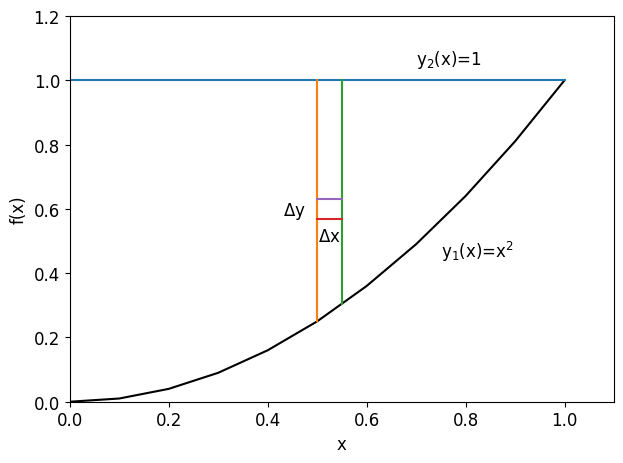

In [3]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size']=12

x = np.linspace(0,1,11)
y = x**2

plt.plot(x,y,'k')
plt.plot(x,[1]*len(x))
plt.plot([0.5]*len(x),np.linspace(.25,1,11))
plt.plot([0.55]*len(x),np.linspace(.3025,1,11))

plt.plot(np.linspace(.5,.55,11),[0.57]*len(x))
plt.plot(np.linspace(.5,.55,11),[0.63]*len(x))
plt.ylim(0,1.2);
plt.xlim(0,1.1);
plt.xlabel('x')
plt.ylabel('f(x)')
plt.text(.43,.58,'$\Delta$y')
plt.text(.7,1.05,'y$_2$(x)=1')
plt.text(.502,.5,'$\Delta$x')
plt.text(.75,.45,'y$_1$(x)=x$^{2}$')
plt.tight_layout()
plt.show()

In [4]:
%reset -f

from sympy import symbols, integrate, sqrt
print('-'*28,'CODE OUTPUT','-'*29,'\n')
x, y, k = symbols('x, y, k',real=True)   # define symbols

f = k*(x+y)                              # function to integrate

integraly = integrate(f,  (y, x**2, 1), (x,0,1))    # vary y first
integralx = integrate(f,  (x, 0, sqrt(y)), (y,0,1)) # vary x first

print('Integral of f=x+y with y-integration first is =',integraly)
print('Integral of f=x+y with x-integration first is:',integralx)

---------------------------- CODE OUTPUT ----------------------------- 

Integral of f=x+y with y-integration first is = 13*k/20
Integral of f=x+y with x-integration first is: 13*k/20


**Example 5.4: Total electric charge $Q$ in  a non-uniform charge density**

In [5]:
%reset -f

from sympy import symbols, integrate
print('-'*28,'CODE OUTPUT','-'*29,'\n')
x, y, z, a = symbols('x, y, z, a',real=True)  # define symbols

f = a*z    # function to integrate

integralxy = integrate(f,  (x, 0, 1-y), (y,0,1),(z,0,1))  # x-then-y
integralyx = integrate(f,  (y, 0, 1-x), (x,0,1),(z,0,1))  # y-then-x

print('Charge inside the prism (integrate x then y)=',integralxy)
print('Charge inside the prism (integrate y then x)=',integralyx)

---------------------------- CODE OUTPUT ----------------------------- 

Charge inside the prism (integrate x then y)= a/4
Charge inside the prism (integrate y then x)= a/4


**Example 5.5: Evaluating the center of mass of non-uniform 3D object**

In [6]:
%reset -f

from sympy import symbols, integrate
print('-'*28,'CODE OUTPUT','-'*29,'\n')
x, y, z, a= symbols('x, y, z, a',real=True)  # define symbols

f = a*z

integral1 = integrate(f,  (z,0,1-x-y),(x, 0, 1-y), (y,0,1)) # find ZCM
M = integrate(a,  (z,0,1-x-y),(x, 0, 1-y), (y,0,1))  # find mass M

print('Total mass M =',M)
print('Z-location of Center of mass of prism =',round(integral1/M,2))

---------------------------- CODE OUTPUT ----------------------------- 

Total mass M = a/6
Z-location of Center of mass of prism = 0.25


**Example 5.6: The gravitational force exterted by a disk on point mass $m$**

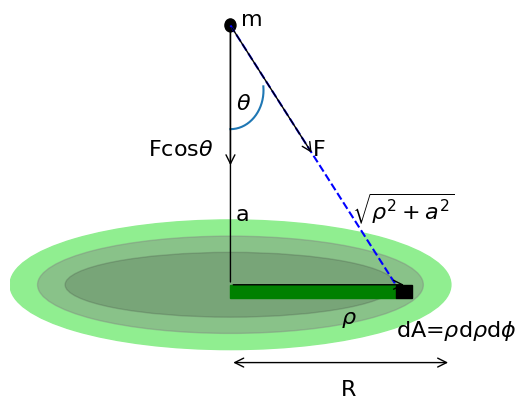

In [7]:
%reset -f

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size']=16
fig, ax = plt.subplots();

p = matplotlib.patches.Ellipse(xy=(-200, -300), width=800, height=200,color='lightgreen');
ax.add_patch(p);
p = matplotlib.patches.Ellipse(xy=(-200, -300), width=600, height=100,color='black',alpha=0.2);
ax.add_patch(p);

p = matplotlib.patches.Ellipse(xy=(-200, -300), width=700, height=150,color='grey',alpha=0.4);
ax.add_patch(p);

rect1 = matplotlib.patches.Rectangle((-200, -300), 300, -20, color ='green')
ax.add_patch(rect1);
ax.axis('off');
plt.annotate('', xy=(-200,-300), xytext=(120,-300), arrowprops=dict(arrowstyle='<-'));
plt.annotate('', xy=(-200,-300), xytext=(-200,100), arrowprops=dict(arrowstyle='-'));
plt.annotate('', xy=(-200,-420), xytext=(200,-420), arrowprops=dict(arrowstyle='<->'));
plt.xlim([-600, 300]);
plt.ylim([-450, 120]);

plt.annotate('', xy=(-200,100), xytext=(-200,-120), arrowprops=dict(arrowstyle='<-'));
plt.annotate('', xy=(-200,100), xytext=(-50,-100), arrowprops=dict(arrowstyle='<-'));
plt.text(-50,-100,'F');
plt.text(-350,-100,r'Fcos$\theta$');

t=np.linspace(.1,-np.pi/2,20)
x=-200+60*np.cos(t)
y=60*np.sin(t)
plt.plot(x,y);
point1 = [-200, 100]
point2 = [100, -300]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, 'b', linestyle="--");
plt.text(20,-200,r'$\sqrt{\rho^{2}+a^{2}}$');

plt.text(0,-470,'R');
plt.text(-180,100,'m');
plt.text(-190,-200,'a');
plt.text(-190,-30,r'$\theta$');
plt.text(100,-380,r'dA=$\rho$d$\rho$d$\phi$');

plt.text(0,-360,r'$\rho$');
rect2 = matplotlib.patches.Rectangle((100, -300), 30, -20, color ='black',alpha=1.)
ax.add_patch(rect2);

circ2 = matplotlib.patches.Circle((-200, 100), 10, color ='black',alpha=1.)
ax.add_patch(circ2);

plt.rcParams.update(plt.rcParamsDefault);
plt.show()

In [8]:
%reset -f

from sympy import symbols, integrate, simplify, pi
print('-'*28,'CODE OUTPUT','-'*29,'\n')
rho, a, R, phi, A = symbols('rho,  a, R, phi, A',positive=True)
# define symbols

f = a* rho/((rho**2+a**2)**(3/2))             # function to integrate

res1 = integrate(f, (rho,0,R),(phi,0,2*pi))

print('The gravitational force F =',A*simplify(res1))

---------------------------- CODE OUTPUT ----------------------------- 

The gravitational force F = A*(-2.0*pi*a/(R**2 + a**2)**0.5 + 2.0*pi)


**Example 5.7: Moment of inertia of cone**

In [9]:
%reset -f

from sympy import symbols, Poly, integrate, pi
print('-'*28,'CODE OUTPUT','-'*29,'\n')

rho,  phi, z, H, R, m = symbols('rho,  phi, z, H, R, m ',real=True)
#  define symbols

I = integrate(rho**3,(z,rho*H/R,H),(rho,0,R),(phi,0,2*pi))

print('Moment of inertia tensor for cone: I= ',I*m/(pi*R**2*H/3))

---------------------------- CODE OUTPUT ----------------------------- 

Moment of inertia tensor for cone: I=  3*R**2*m/10


**Example 5.8: Gravitational force between a hemisphere and mass $m$**

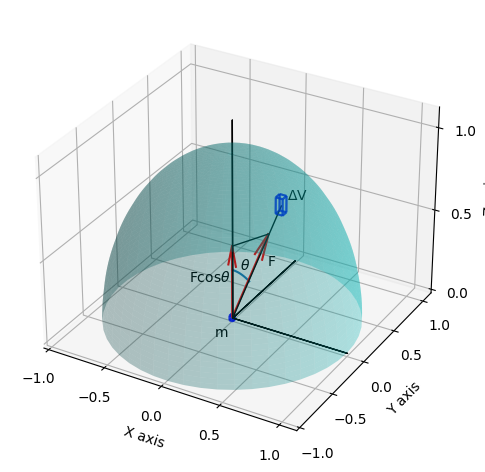

In [10]:
%reset -f

from mpl_toolkits.mplot3d.art3d import Line3DCollection, Poly3DCollection
import matplotlib.pyplot as plt
import numpy as np

# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi/2:50j, 0.0:2.0*pi:50j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)
theta=np.linspace(np.pi/3,np.pi/2,10)

r=0.3
x = r*cos(theta)
z = r*sin(theta)
y = [0]*len(x)
ax.plot3D(x,y,z)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xticks([-1,-.5,0,.5,1])
ax.set_yticks([-1,-.5,0,.5,1])
ax.set_zticks([-1,-.5,0,.5,1])

def plot_cuboid(center, size):
    ox, oy, oz = center
    l, w, h = size

    x = np.linspace(ox-l/2,ox+l/2,num=10)
    y = np.linspace(oy-w/2,oy+w/2,num=10)
    z = np.linspace(oz-h/2,oz+h/2,num=10)
    x1, z1 = np.meshgrid(x, z)
    y11 = np.ones_like(x1)*(oy-w/2)
    y12 = np.ones_like(x1)*(oy+w/2)
    x2, y2 = np.meshgrid(x, y)
    z21 = np.ones_like(x2)*(oz-h/2)
    z22 = np.ones_like(x2)*(oz+h/2)
    y3, z3 = np.meshgrid(y, z)
    x31 = np.ones_like(y3)*(ox-l/2)
    x32 = np.ones_like(y3)*(ox+l/2)

    ax.plot_wireframe(x1, y11, z1, color='b', rstride=10, cstride=10, alpha=0.6)
    ax.plot_wireframe(x1, y12, z1, color='b', rstride=10, cstride=10, alpha=0.6)
    ax.plot_wireframe(x2, y2, z21, color='b', rstride=10, cstride=10, alpha=0.6)
    ax.plot_wireframe(x2, y2, z22, color='b', rstride=10, cstride=10, alpha=0.6)
    ax.plot_wireframe(x31, y3, z3, color='b', rstride=10, cstride=10, alpha=0.6)
    ax.plot_wireframe(x32, y3, z3, color='b', rstride=10, cstride=10, alpha=0.6)


def test():
    center = [0.2, 0.4, 0.6]
    length = .06
    width = .06
    height = 1.1
    plot_cuboid(center, (length, width, height))

def test2():
    center = [0.2, 0.4, 0.6]
    length = .06
    width = .06
    height = .1
    plot_cuboid(center, (length, width, height))

def test3():
    center = [0., 0., 0.]
    length = .03
    width = .03
    height = .03
    plot_cuboid(center, (length, width, height))


ax.set_xlim([-1,1.1]);
ax.set_ylim([-1,1.1]);
ax.set_zlim([0,1.1]);
ax.text(.2,.5,.6,'$\Delta$V')
ax.text(-.1,-.1,-.1,'m')
ax.text(.2,.2,.3,'F')
ax.text(.01,.1,.27,r'$\theta$')
ax.text(-.24,-.24,.27,r'Fcos$\theta$')

ax.quiver(0,0,0,.15,.3,.45,color='red',length=1,arrow_length_ratio=.3)
ax.quiver(0,0,0,0,0,.45,color='red',length=1,arrow_length_ratio=.3)

def callpoly(triang):
    poly =Poly3DCollection(triang,color='k',alpha=0.1)
    ax.add_collection3d(poly)

shape=[((0,0,.45),(.15,.3,.45))] # draw axes
callpoly(shape)

shape=[((0,0,0),(0,1,0),(0,0,0),(1,0,0),(0,0,0),(0,0,1.2))] # draw axes
callpoly(shape)

shape=[((0,0,0),(0.2,.4,.6))] # radial distance
callpoly(shape)

test2()  # draw dV box
test3()
plt.tight_layout()

plt.show()

In [11]:
%reset -f

from sympy import symbols, integrate, pi, sin, cos
print('-'*28,'CODE OUTPUT','-'*29,'\n')

G, m, M, r, R, theta, phi = symbols('G, m, M, r, R, theta, phi',real=True)
# define symbols

rho = M/((4*pi*R**3)/3)
f = G*m*rho* cos(theta)         # function to integrate in spherical

res1 = integrate(f, (r, 0, R), (phi, 0, 2*pi),(theta,0,pi/2))
print('Force on mass m=',res1)

---------------------------- CODE OUTPUT ----------------------------- 

Force on mass m= 3*G*M*m/(2*R**2)


**Example 5.9: Moment of inertia tensor of a square plate**

In [12]:
%reset -f

from sympy import symbols, integrate, Matrix
import pprint

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y, a, M = symbols('x, y, a, M',real=True)  #  symbols

# evaluate the itegrals using triple itegration in SymPy
Ixx = Iyy  = integrate(x**2, (x,0,a), (y,0,a))*M/a**2

Izz = integrate(x**2+y**2, (x,0,a), (y,0,a))*M/a**2

Ixy = Iyx =  -integrate(x*y,(x,0,a), (y,0,a))*M/a**2

Ixz = Iyz =  0    # because z=0

I = Matrix([[Ixx,Ixy,Ixz], [Ixy,Iyy,Iyz], [Ixz,Iyz,Izz]])
print('Moment of inertia tensor I =')

pp = pprint.PrettyPrinter(width=41, compact=True)
pp.pprint(I)

---------------------------- CODE OUTPUT ----------------------------- 

Moment of inertia tensor I =
Matrix([
[ M*a**2/3, -M*a**2/4,          0],
[-M*a**2/4,  M*a**2/3,          0],
[        0,         0, 2*M*a**2/3]])


**Example 5.10: Mechanics: The moment of inertia tensor of a cube**

In [13]:
%reset -f

from sympy import symbols, integrate, Matrix
import pprint

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y, z, a, m = symbols('x, y, z, a, m',real=True)  #  symbols

# evaluate the itegrals using triple itegration in SymPy
Ixx = Iyy =Izz = integrate(y**2+x**2, (x,0,a), (y,0,a),( z,0,a))*m/a**3

Ixy = Ixz = Iyz= -integrate(x*y,(x,0,a), (y,0,a), (z,0,a))*m/a**3

I = Matrix([[Ixx,Ixy,Ixz], [Ixy,Iyy,Iyz], [Ixz,Iyz,Izz]])
print('Moment of inertia tensor I =')

pp = pprint.PrettyPrinter(width=41, compact=True)
pp.pprint(I)

---------------------------- CODE OUTPUT ----------------------------- 

Moment of inertia tensor I =
Matrix([
[2*a**2*m/3,  -a**2*m/4,  -a**2*m/4],
[ -a**2*m/4, 2*a**2*m/3,  -a**2*m/4],
[ -a**2*m/4,  -a**2*m/4, 2*a**2*m/3]])


**Example 5.11: The moment of inertia tensor of a triangular plate**

In [14]:
%reset -f

from scipy.integrate import dblquad
import numpy as np
from sympy import symbols
print('-'*28,'CODE OUTPUT','-'*29,'\n')

c, M = symbols('c, M',real=True)

yupper = lambda x: 1-x          #defines the upper limit of integration

def f(i):
    return dblquad(i, 0, 1,   0, yupper)[0]

Ixx = Iyy = lambda y, x: (y**2) #z = 0
Izz = lambda y, x: (y**2+x**2)  #z = 0

Ixy = lambda y, x: -x*y
Ixz = Iyz = 0                   #z = 0

I = np.array([[f(Ixx),f(Ixy),Ixz],[f(Ixy),f(Iyy),Iyz],\
[Ixz,Iyz,f(Izz)]])
print('Moment of inertia tensor I=')
I

---------------------------- CODE OUTPUT ----------------------------- 

Moment of inertia tensor I=


array([[ 0.08333333, -0.04166667,  0.        ],
       [-0.04166667,  0.08333333,  0.        ],
       [ 0.        ,  0.        ,  0.16666667]])

**Example 5.12: The moment of inertia tensor of a triangular pyramid**

In [16]:
%reset -f

from scipy.integrate import tplquad
import numpy as np
from sympy import symbols
print('-'*28,'CODE OUTPUT','-'*29,'\n')

c, M = symbols('c, M',real=True)  #  symbols

z2 = lambda y, z: 1-y-z #upper limit for z integration
x2 = lambda z: 1-z      #upper limit for x integration

def f(i):
    return tplquad(i, 0, 1,   0, x2,   0, z2)[0]

Ixx = lambda z, y, x: (y**2+z**2)
Iyy = lambda z, y, x: (x**2+z**2)
Izz = lambda z, y, x: (y**2+x**2)

Ixy = lambda z, y, x: -x*y
Ixz = lambda z, y, x: -x*z
Iyz = lambda z, y, x: -y*z

I = np.array([[f(Ixx),f(Ixy),f(Ixz)],[f(Ixy),f(Iyy),f(Iyz)],\
[f(Ixz),f(Iyz),f(Izz)]])
print('Moment of inertia tensor I=')
I

---------------------------- CODE OUTPUT ----------------------------- 

Moment of inertia tensor I=


array([[ 0.03333333, -0.00833333, -0.00833333],
       [-0.00833333,  0.03333333, -0.00833333],
       [-0.00833333, -0.00833333,  0.03333333]])